# • [AI timelines deference survey](https://forum.effectivealtruism.org/posts/FtggfJ2oxNSN8Niix/when-reporting-ai-timelines-be-clear-who-you-re-not) – conducted by [Sam Clarke](https://www.governance.ai/team/sam-clarke)

# ADD TITLES TO FIGURES!!!!!!!!

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from typing import List
import scipy.stats as stats 
import itertools
import functools
from utils import *

%matplotlib inline

## • Set some plotting parameters and load the data

In [33]:
default_plotting_params()

In [34]:
timelines_deference, timelines_deference_cleaned, \
    timelines_deference_self_other, timelines_deference_category = load_data()

## • Deference for "self" vs "other"

### Here, "self" refers to some inside view, impression, or explicit deference to oneself; "other" simply means any other individual, group of individuals (informal), or organisation (formal)

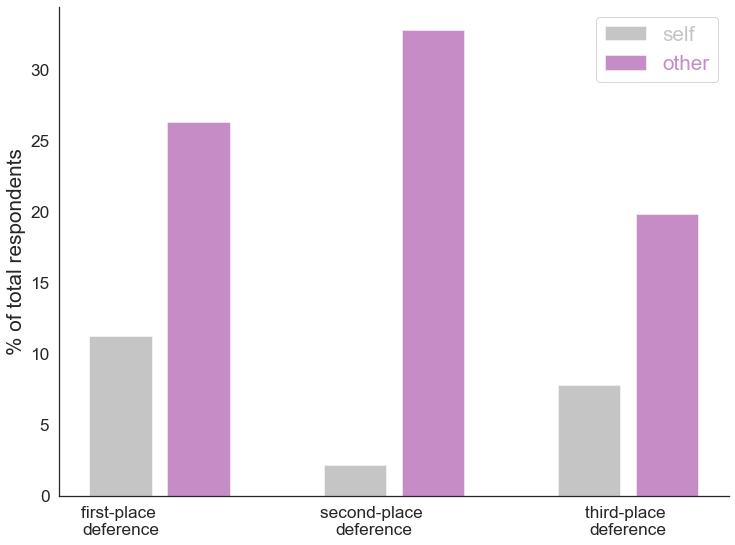

In [35]:
plot_self_vs_other(data=timelines_deference_self_other)

## • Deference by category – do respondents defer to individuals, groups of individuals, or organisations?

### I'll give a more detailed description, along with some examples, here

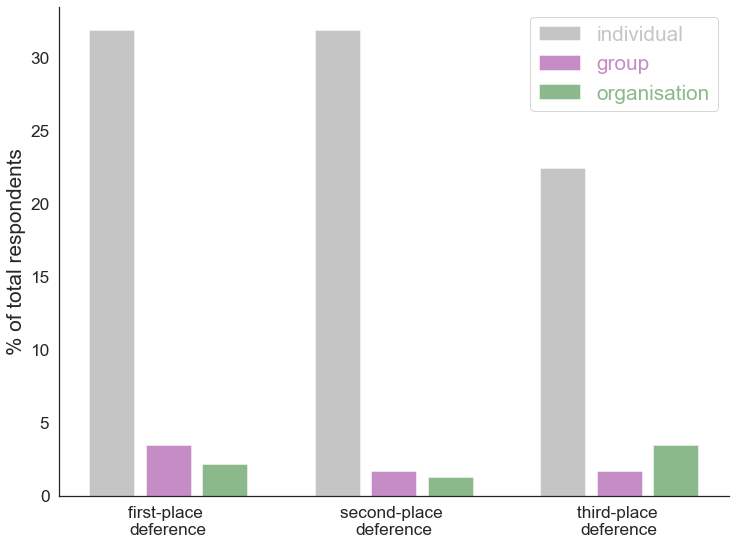

In [5]:
plot_deference_by_category(data=timelines_deference_category)

## • Visualise the responses for each deference rank

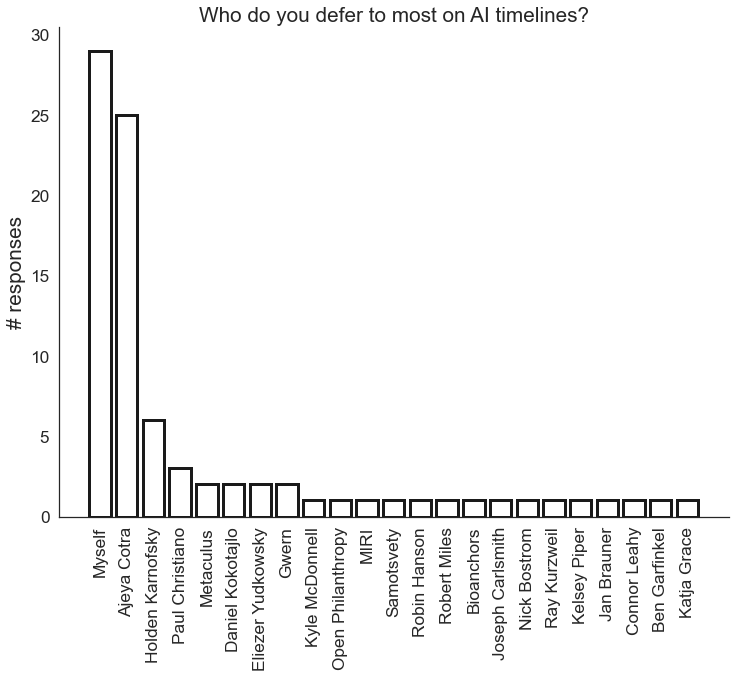

In [6]:
visualise_deference_responses(deference_rank=1, data=timelines_deference_cleaned, include_self_responses=True)

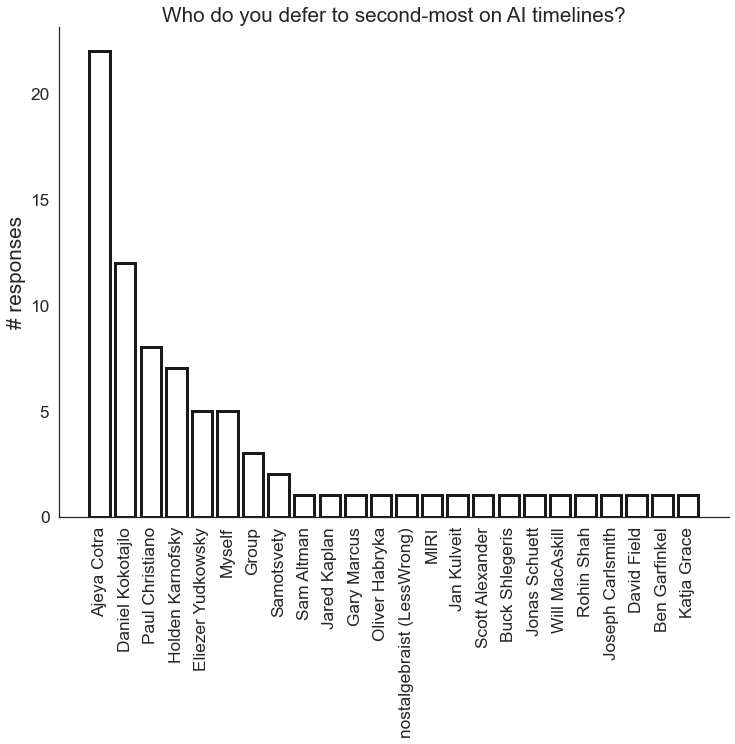

In [7]:
visualise_deference_responses(deference_rank=2, data=timelines_deference_cleaned, include_self_responses=True)

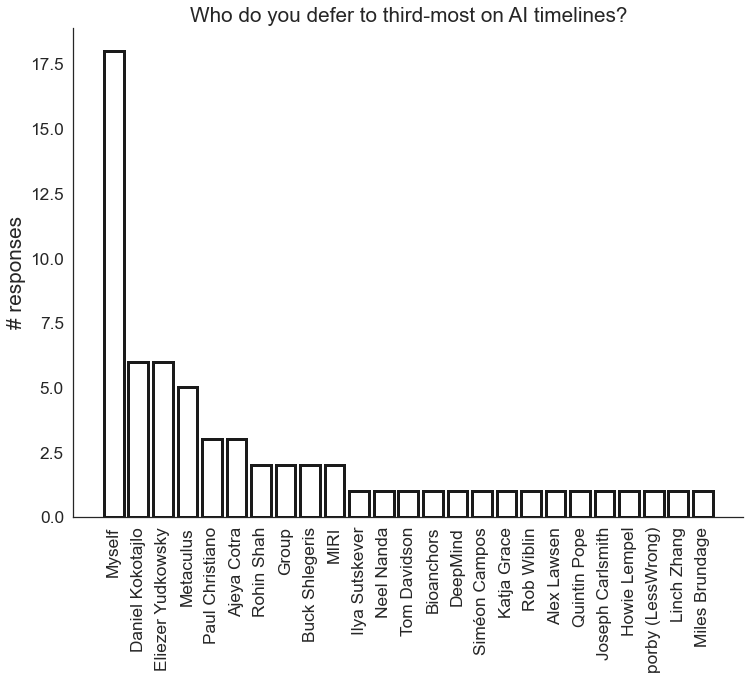

In [8]:
visualise_deference_responses(deference_rank=3, data=timelines_deference_cleaned, include_self_responses=True)

## • Generate a weighted score for deference:
### Three points for "most deference", two points for "second-most", and one point for "third-most"
### DM: fill out a better description....

In [9]:
counts = generate_deference_counts(timelines_deference_cleaned)
result = functools.reduce(lambda x, y: x.combine(y, combine_func), \
                          [counts[column_titles()[0]], counts[column_titles()[1]], counts[column_titles()[2]]])
result_ = result.sort_values(ascending=False)

## • Visualise all weighted deference score responses 

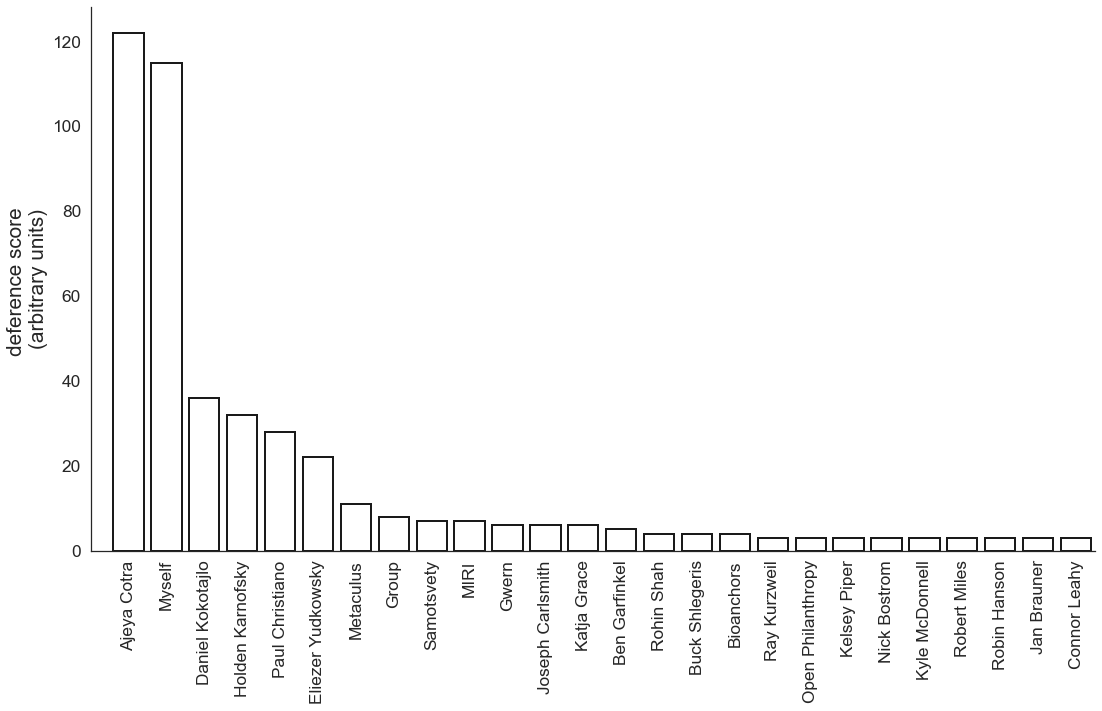

In [25]:
visualise_weighted_deference_(counts[column_titles()[0]], counts[column_titles()[1]], \
                              counts[column_titles()[2]], include_self_responses=True, \
                              xlim_=max([len(counts[column_titles()[0]]), \
                                         len(counts[column_titles()[1]]), len(counts[column_titles()[2]])])
                             )

## plot by clusters of individuals and organisations with correlated views

In [68]:
results_group_1 = [result_["Ajeya Cotra"], result_["Paul Christiano"], result_["Holden Karnofsky"],\
                  result_["Bioanchors"], result_["Open Philanthropy"]]

results_group_2 = [result_["Eliezer Yudkowsky"], result_["MIRI"]]

x_labels_group_1 = ["Ajeya Cotra", "Holden Karnofsky", "Paul Christiano", "Bioanchors", "Open Philanthropy"]

x_labels_group_2 = ["Eliezer Yudkowsky", "MIRI"]

x_labels_groups_concat = x_labels_group_1 + [" "] + x_labels_group_2


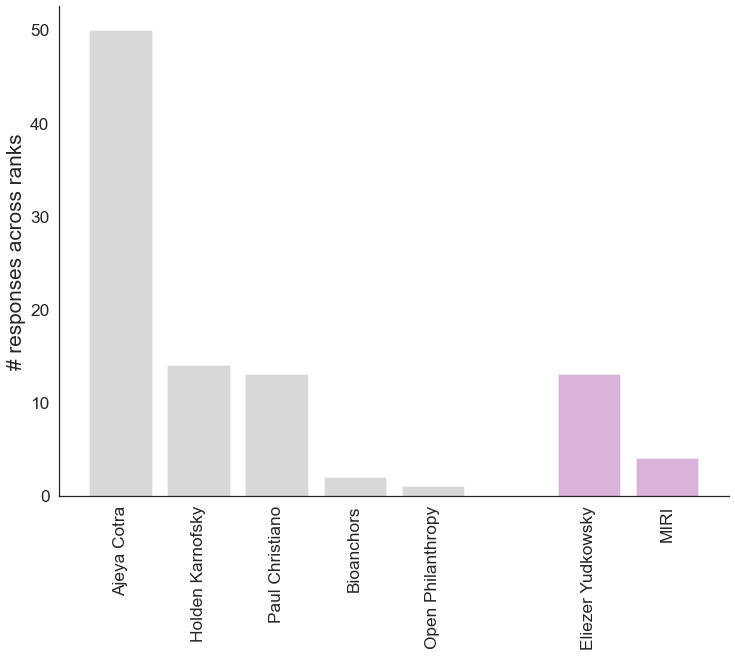

In [115]:
plt.bar(x=np.arange(len(x_labels_group_1)), height=results_group_1, color="grey", alpha=0.3)

plt.bar(x=np.arange(len(x_labels_group_2))+6, height=results_group_2, color="purple", alpha=0.3)

x_labels = x_labels_group_1 + [" "] + x_labels_group_2
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=90)

plt.ylabel("# responses across ranks")
sns.despine();


# same as above, but for including TOTAL number of votes

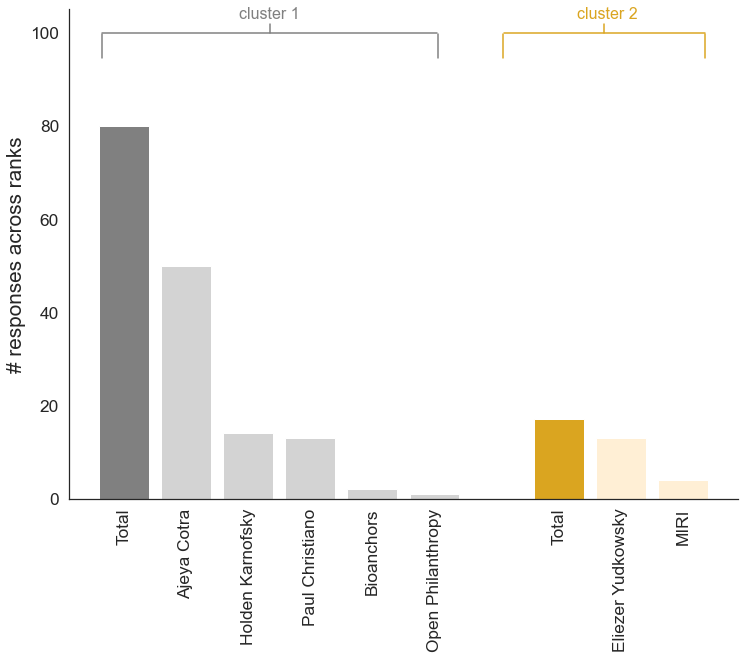

In [202]:
x_labels_group_1_total = ["Total"] + x_labels_group_1
x_labels_group_2_total = ["Total"] + x_labels_group_2
results_group_1_total = [sum(results_group_1)] + results_group_1
results_group_2_total = [sum(results_group_2)] + results_group_2
clrs = ["darkmagenta", "purple", "purple"]
clrs_1 = ["grey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]
clrs_2 = ["goldenrod", "papayawhip", "papayawhip"]

plt.bar(x=np.arange(len(x_labels_group_1_total)), height=results_group_1_total, color=clrs_1, alpha=1)

plt.bar(x=np.arange(len(x_labels_group_2_total))+7, height=results_group_2_total, color=clrs_2, alpha=1)

x_labels = x_labels_group_1_total + [" "] + x_labels_group_2_total
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=90)
plt.ylabel("# responses across ranks")

# Demarcate group 1
plt.axhline(y=100, xmin=0.05, xmax=0.55, c='grey')
plt.axvline(x=-0.35, ymin=0.9, ymax=0.95, c='grey')
plt.axvline(x=5.05, ymin=0.9, ymax=0.95, c='grey')
plt.axvline(x=2.35, ymin=0.9525, ymax=0.97, c='grey', label="cluster 1")

# Demarcate group 2
plt.axhline(y=100, xmin=0.65, xmax=0.95, c='goldenrod')
plt.axvline(x=6.1, ymin=0.9, ymax=0.95, c='goldenrod')
plt.axvline(x=9.35, ymin=0.9, ymax=0.95, c='goldenrod')
plt.axvline(x=(9.35 + 6.1)/2, ymin=0.9525, ymax=0.97, c='goldenrod', label="cluster 2")

# Label the clusters
#plt.legend(labelcolor="linecolor")
plt.annotate("cluster 1", (1.85, 103), xytext=None, fontsize=16, color='grey')
plt.annotate("cluster 2", (7.3, 103), xytext=None, fontsize=16, color='goldenrod')

sns.despine();

In [81]:
results_group_1

[50, 14, 13, 2, 1]

In [82]:
results_group_1_total = [sum(results_group_1)] + results_group_1

In [83]:
results_group_1_total

[80, 50, 14, 13, 2, 1]

In [79]:
x_labels_group_1_total

['Total',
 'Ajeya Cotra',
 'Holden Karnofsky',
 'Paul Christiano',
 'Bioanchors',
 'Open Philanthropy']

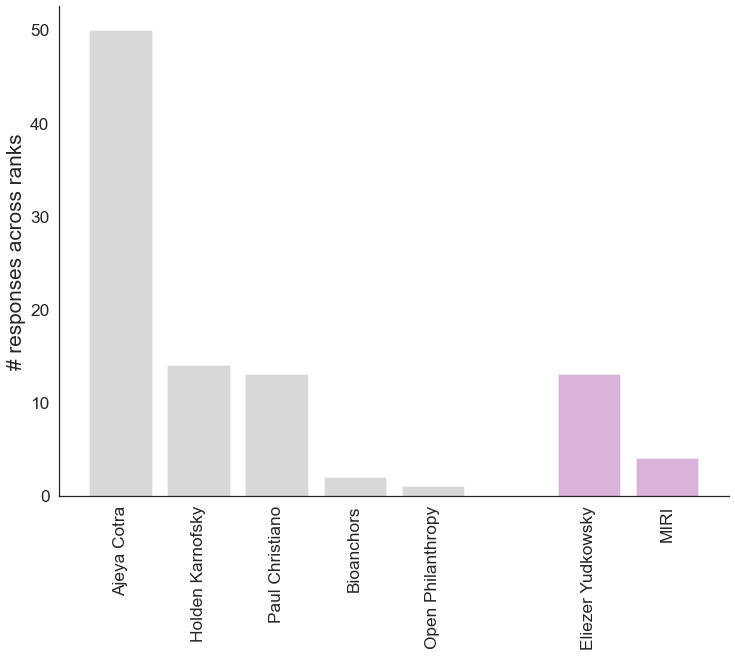

In [76]:
plt.bar(x=np.arange(len(x_labels_group_1)), height=results_group_1, color="grey", alpha=0.3)

plt.bar(x=np.arange(len(x_labels_group_2))+6, height=results_group_2, color="purple", alpha=0.3)

x_labels = x_labels_group_1 + [" "] + x_labels_group_2
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=90)

plt.ylabel("# responses across ranks")
sns.despine();


In [66]:
gg = x_labels_groups_concat = x_labels_group_1 + [" "] + x_labels_group_2

In [67]:
gg

['Ajeya Cotra',
 'Holden Karnofsky',
 'Paul Christiano',
 'Bioanchors',
 'Open Philanthropy',
 ' ',
 'Eliezer Yudkowsky',
 'MIRI']

In [47]:
result_["Open Philanthropy"]

1

In [49]:
result_["Bioanchors"]

2

In [42]:
result_[:]

Myself                        52
Ajeya Cotra                   50
Daniel Kokotajlo              20
Paul Christiano               14
Holden Karnofsky              13
Eliezer Yudkowsky             13
Metaculus                      7
Group                          5
MIRI                           4
Katja Grace                    3
Joseph Carlsmith               3
Rohin Shah                     3
Samotsvety                     3
Buck Shlegeris                 3
Gwern                          2
Ben Garfinkel                  2
Bioanchors                     2
Rob Wiblin                     1
nostalgebraist (LessWrong)     1
Quintin Pope                   1
Ray Kurzweil                   1
Will MacAskill                 1
Scott Alexander                1
Tom Davidson                   1
Robert Miles                   1
Robin Hanson                   1
Siméon Campos                  1
Sam Altman                     1
Oliver Habryka                 1
Open Philanthropy              1
Linch Zhan

In [ ]:
max([len(counts[column_titles()[0]]), len(counts[column_titles()[1]]), len(counts[column_titles()[2]])])

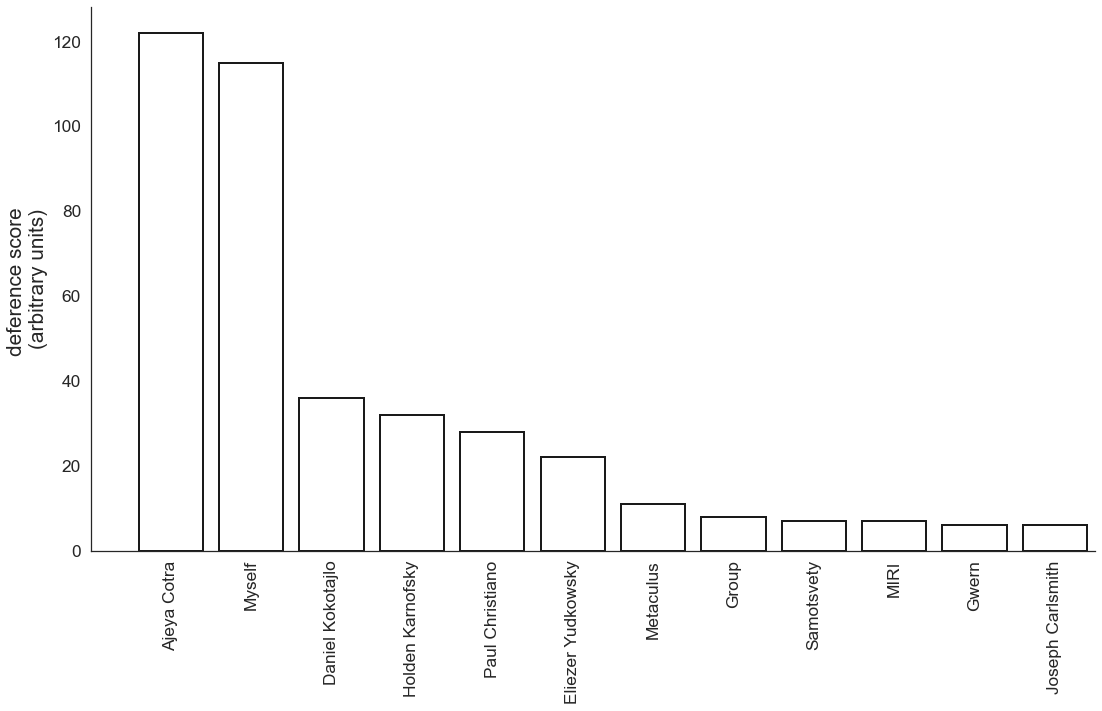

In [10]:
visualise_weighted_deference_(counts[column_titles()[0]], counts[column_titles()[1]], \
                              counts[column_titles()[2]], include_self_responses=True, xlim_=11)

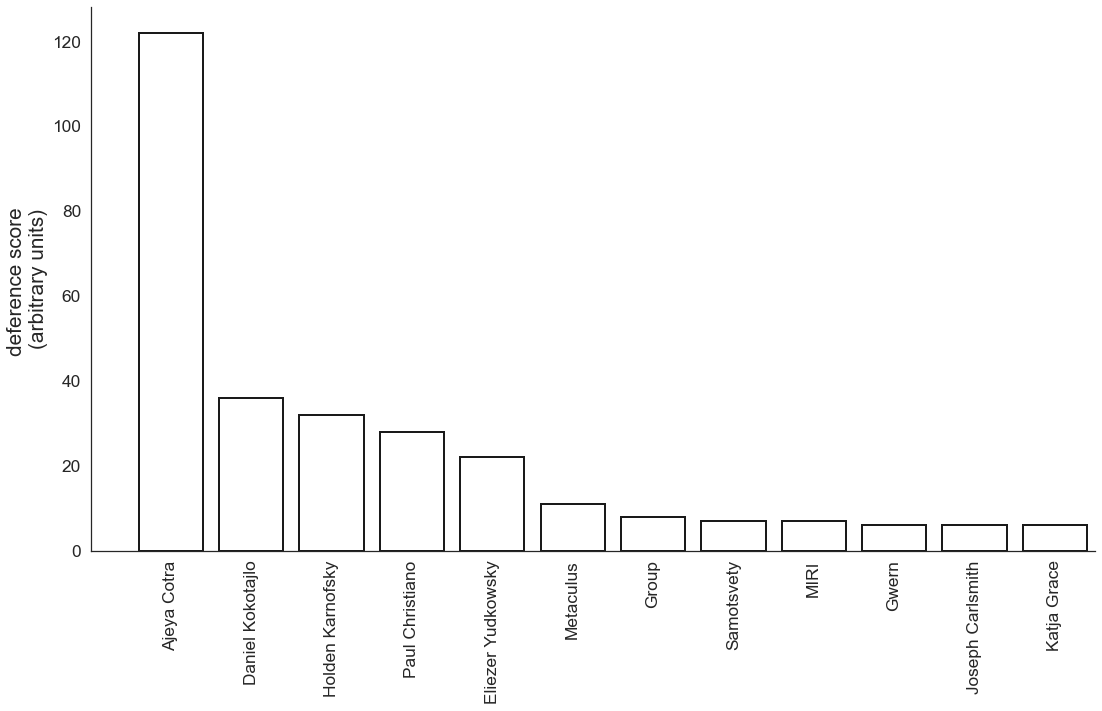

In [11]:
visualise_weighted_deference_(counts[column_titles()[0]], counts[column_titles()[1]], \
                              counts[column_titles()[2]], include_self_responses=False, xlim_=11)

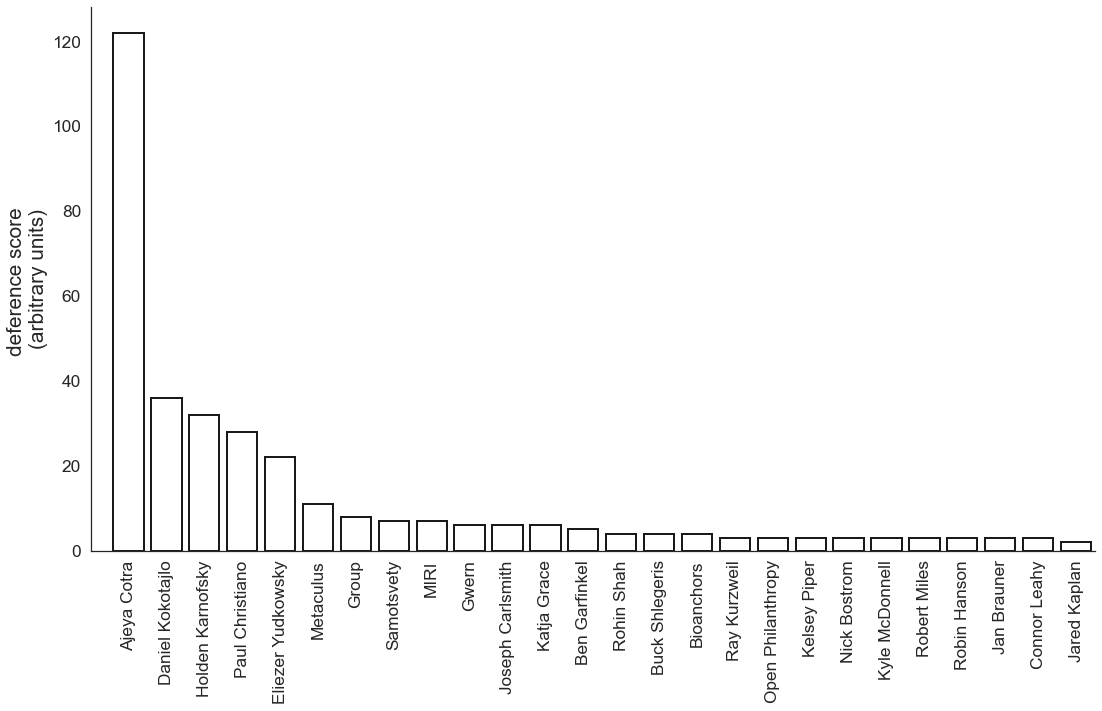

In [14]:
visualise_weighted_deference_(counts[column_titles()[0]], counts[column_titles()[1]], \
                              counts[column_titles()[2]], include_self_responses=False, \
                              xlim_=len(counts[column_titles()[2]]))

In [20]:
for i in range(3):
    print(len(counts[column_titles()[i]]))
    

23
24
25


In [19]:
max([len(counts[column_titles()[0]], counts[column_titles()[1]], counts[column_titles()[2]])])

TypeError: len() takes exactly one argument (3 given)

In [21]:
max([0,1,2])

2

In [23]:
[len(counts[column_titles()[0]]), len(counts[column_titles()[1]]), len(counts[column_titles()[2]])]

[23, 24, 25]

In [24]:
max([len(counts[column_titles()[0]]), len(counts[column_titles()[1]]), len(counts[column_titles()[2]])])

25